# Generative Adversarial Networks

In [39]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
import os
!pip install wget
import wget

## Configuration

In [20]:
DEVICE = 'cuda'
# Spatial size of training images. All images will be resized to this
IMAGE_SIZE = 64
BATCH_SIZE = 128
NOISE_DIM = 64 # shape of the noise
# Optimizer parameters
LEARNING_RATE = 0.0002
BETA_1 = 0.5
BETA_2 = 0.99
# Training variables
EPOCHS = 20

## Datasets

In [28]:
from torchvision import datasets
from torchvision import transforms as T

# Load the datasets 
def download_file(url, filename):
    def bar_progress(current, total, width=80):
      progress_msg = "Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total)
      sys.stdout.write("\r" + progress_msg)
      sys.stdout.flush()

    if os.path.exists('_downloaded')==False:
        os.mkdir('_downloaded')
        
    filepath = os.path.join('_downloaded', filename)
    if os.path.exists(filepath)==True:
        return filepath
    
    wget.download(url, filepath, bar=bar_progress)
    return filepath

# Download training file
url = 'https://raw.githubusercontent.com/vincentbonnetcg/Numerical-Bric-a-Brac/master/data/datasets/FacialKeypointsDetection/training.zip'
filepath = download_file(url,  'training.zip')
# Load training file
training_df = pd.read_csv(filepath)
# Infos
print('# Raw dataframe shape : {}'.format(training_df.shape))
# Cleanup the missing images (should be fine in this particular dataset)
training_df.dropna(subset=['Image'], inplace=True)
training_df.reset_index(inplace = True, drop=True)
print('# Clean dataframe shape : {}'.format(training_df.shape))
# Image attribute Infos
print('The image is of type {}'.format(type(training_df['Image'][0])))
print('The image data looks like {}...'.format(training_df['Image'][0][1:10]))

# Raw dataframe shape : (7049, 31)
# Clean dataframe shape : (7049, 31)
The image is of type <class 'str'>
The image data looks like 38 236 23...


## Prepare images

In [32]:
# Convert images from string to int
func = lambda x : np.fromstring(x, dtype=int, sep=' ').reshape(96, 96)
images = training_df['Image'].apply(func)

# Normalize the data
normalized_images = images / 255 

# Create an empty array to train to train the model
X = np.empty((len(normalized_images),96,96,1))

for i in range(len(normalized_images)):
    X[i,] = np.expand_dims(normalized_images[i], axis=2) # from (96,96) to (96,96,1)

X = np.asarray(X).astype(np.float32)
print('X shape {}'.format(X.shape))
print('X values range from {} to {}'.format(np.min(X), np.max(X)))


X shape (7049, 96, 96, 1)
X values range from 0.0 to 1.0


## Image Visualization

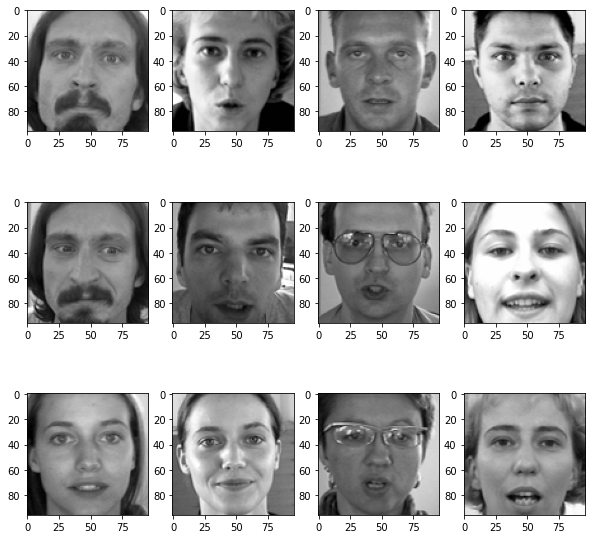

In [34]:
fig = plt.figure(figsize=(10,10))
for image_id in range(12):
    ax = fig.add_subplot(3,4,image_id+1)
    plt.imshow(np.squeeze(X[image_id]), cmap='gray')

## Create device

In [38]:
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
print('device : {}'.format(device))

device : cpu


## Further Reading

- Goodfellow, Ian, Jean Pouget-Abadie, Mehdi Mirza, Bing Xu, David Warde-Farley, Sherjil Ozair, Aaron Courville, and Yoshua Bengio. "Generative adversarial networks." Communications of the ACM 63, no. 11 (2020): 139-144.
- https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html